##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Analyze a Video - Classification

This notebook uses multimodal capabilities of the Gemini model to classify the species of animals shown in a video.

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Analyze_a_Video_Classification.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

In [ ]:
%pip install -U -q "google-genai>=1.0.0"

## Configure your API key

To run the following cell, your API key must be stored in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata
from google import genai

API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=API_KEY)

## Example

This example uses a [video](https://commons.wikimedia.org/wiki/File:American_black_bears_%28Ursus_americanus%29.webm) published by Bryon Evans containing an American black bear.

The video falls under the [Creative Commons Attribution 3.0 Unported license](https://creativecommons.org/licenses/by/3.0/deed.en).

In [ ]:
# Download video
path = "black_bear.webm"
url = "https://upload.wikimedia.org/wikipedia/commons/8/81/American_black_bears_%28Ursus_americanus%29.webm"
!wget $url -O $path

--2025-03-04 13:24:57--  https://upload.wikimedia.org/wikipedia/commons/8/81/American_black_bears_%28Ursus_americanus%29.webm
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45046409 (43M) [video/webm]
Saving to: ‘black_bear.webm’

black_bear.webm     100%[===================>]  42.96M  27.5MB/s    in 1.6s    

2025-03-04 13:24:58 (27.5 MB/s) - ‘black_bear.webm’ saved [45046409/45046409]



Upload the file using the File API so its easier to pass it to the model later on.

In [ ]:
# Upload video
video_file = client.files.upload(file=path)

In [ ]:
import time
# Wait until the uploaded video is available
while video_file.state.name == "PROCESSING":
  print('.', end='')
  time.sleep(5)
  video_file = client.files.get(name=video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)

..

To demonstrate the video content, display the first frame:

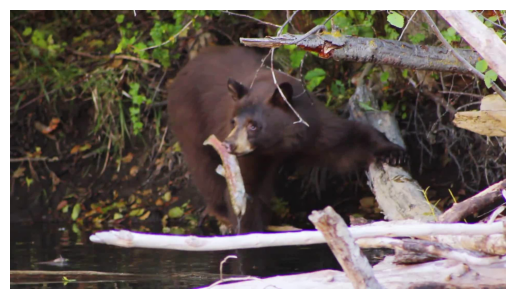

In [ ]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(path)
_, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

# close video file
cap.release()

The uploaded video is ready to be analyzed. The constructed prompt instructs the model to classify animals in the video. In addition to providing both their English and Latin names.

In [ ]:
system_prompt = """
You are a zoologist whose job is to name animals in videos.
You should always provide an english and latin name.
"""

In [ ]:
from google.genai import types

MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}
response = client.models.generate_content(
    model=f"models/{MODEL_ID}",
    contents=[
        "Please identify the animal(s) in this video",
        video_file
        ],
    config=types.GenerateContentConfig(
        system_instruction=system_prompt,
        ),
    )
print(response.text)

Okay! Here are the animals in the video.

- American Black Bear (Ursus americanus)

Hope this helps!


As you can see, the model accurately named the animal and provided a correct Latin name.

You can delete the video to prevent unnecessary data storage.

In [ ]:
# Delete video
client.files.delete(name=video_file.name)

DeleteFileResponse()

## Summary

Now you know how you can prompt Gemini models with videos and use them to classify species of animals.

This notebook shows only one of many use cases. Check the [Video understanding](../quickstarts/Video_understanding.ipynb) notebook for more examples of using the Gemini API with videos.